In [81]:
% matplotlib inline


UsageError: Line magic function `%` not found.


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error

In [83]:
housing_data = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",header = None)

In [84]:
housing_data.columns = ['crime_rate','zoned_land','industry','bounds_river','nox_conc','rooms','age','distance','highways','tax','pt_ratio','b_estimator','pop_status','price']

In [85]:
housing_data

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [86]:
housing_data.describe()

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.696228,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,1.999689,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.073700,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.107300,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.112625,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [87]:
housing_data.dtypes

crime_rate      float64
zoned_land      float64
industry        float64
bounds_river      int64
nox_conc        float64
rooms           float64
age             float64
distance        float64
highways          int64
tax             float64
pt_ratio        float64
b_estimator     float64
pop_status      float64
price           float64
dtype: object

In [88]:
housing_attributes =housing_data.drop(columns = "price")
housing_attributes.shape

(506, 13)

In [89]:
housing_prices = housing_data.price

In [90]:
housing_prices.shape

(506,)

In [91]:
# Preprocessing
scaler = MinMaxScaler()

housing_attributes_scaled = scaler.fit_transform(housing_attributes)
housing_attributes_scaled

array([[0.        , 0.18      , 0.06781525, ..., 0.28723404, 1.        ,
        0.08967991],
       [0.00210738, 0.        , 0.24230205, ..., 0.55319149, 1.        ,
        0.2044702 ],
       [0.00210538, 0.        , 0.24230205, ..., 0.55319149, 0.98973725,
        0.06346578],
       ...,
       [0.00546574, 0.        , 0.42045455, ..., 0.89361702, 1.        ,
        0.10789183],
       [0.01036824, 0.        , 0.42045455, ..., 0.89361702, 0.99130062,
        0.13107064],
       [0.00412541, 0.        , 0.42045455, ..., 0.89361702, 1.        ,
        0.16970199]])

In [92]:
# test a model 
linear_regression = LinearRegression()

In [93]:
linear_regression.fit(housing_attributes_scaled,housing_prices)

LinearRegression()

In [94]:
linear_regression.coef_

array([  2.08448854,   1.49403979,   0.34690497,   3.00565375,
        -7.54441381,  22.43940145,   0.27658754,  -9.35981793,
         1.35281035,  -1.26826011,  -9.07603108,   3.74177288,
       -19.03479847])

In [95]:
linear_regression.score(housing_attributes_scaled,housing_prices)

0.7198065414937174

In [96]:
predictions = linear_regression.predict(housing_attributes_scaled)
np.sqrt(mean_squared_error(housing_prices,predictions))

4.86351800705635

In [97]:
ransac = RANSACRegressor(
    base_estimator=LinearRegression(),
    max_trials=200,
    min_samples=0.25
)

In [98]:
ransac.fit(housing_attributes_scaled,housing_prices)

RANSACRegressor(base_estimator=LinearRegression(), max_trials=200,
                min_samples=0.25)

In [99]:
ransac.estimator_.coef_

array([-0.78128377, -0.37220691,  0.06598606,  1.84026373, -3.57990844,
       31.61695526, -3.36931547, -5.74321878,  0.98576207, -1.67060487,
       -7.14880428,  5.94413268, -7.95018996])

In [100]:
ransac.inlier_mask_.sum()/len(housing_prices)

0.7569169960474308

In [105]:
inliers = housing_data[ransac.inlier_mask_]
outliers = housing_data[~ransac.inlier_mask_]

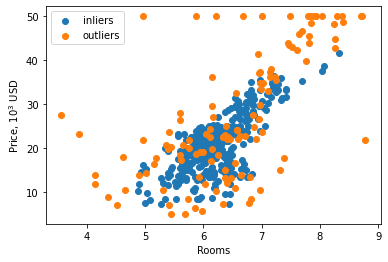

In [110]:
plt.scatter(inliers.rooms, inliers.price,label = "inliers")
plt.scatter(outliers.rooms, outliers.price,label = "outliers")

plt.xlabel('Rooms')
plt.ylabel('Price, $10^3$ USD')
plt.legend()

plt.show()

In [111]:
ransac.score(housing_attributes_scaled,housing_prices)

0.6765643092667772

In [116]:
# we aim to use the inliers in order to achieve the highest accuracy possible
ransac.score(housing_attributes_scaled[ransac.inlier_mask_],housing_prices[ransac.inlier_mask_])

0.9091140935247265

In [115]:
ransac.score(housing_attributes_scaled[~ransac.inlier_mask_],housing_prices[~ransac.inlier_mask_])

0.48804196829352253

In [125]:
polynomial_features = PolynomialFeatures(degree= 5,interaction_only=True)
polynomial_features.fit_transform(housing_attributes_scaled).shape

(506, 2380)